In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from scipy.optimize import curve_fit, brentq
from scipy.stats import gamma
from gamma_case import gamma_shift, sim_gamma

In [2]:
theta_set = np.array([0.25, 0.5, 1, 3, 7, 10, 20, 30])
# for a_set we will choose scale = 2
k_set = np.array([0.5, 1, 2, 3, 5, 7, 9])
# for scale_set we will choose a = 2

# Chapter 1

In [3]:
def params_shift(params_set, mode = "theta"):
    """
    Visualize the initial parameters of gamma distribution 
    against the estimated ones
    
    @params_set {list} - set of parameters
    @mode {str} - mode of visualization
    """
    # Selection parameter for iteration
    mode_dict = {
        "theta": lambda p: gamma_shift(theta = p, k = 2, n_fol = 1000),  # p is interpreted as θ
        "k": lambda p: gamma_shift(theta = 2, k = p, n_fol = 1000),  # p is interpreted as k
    }

    func = mode_dict[mode]
    print(func)

    theta_set_prime = []
    k_set_prime = []
    for p in params_set:
        for i in range(30):
            res = func(p)
            theta_set_prime.append(res[0])
            k_set_prime.append(res[1])
    
    # Average the 30 repetitions for each parameter value.
    theta_set_prime = np.array(theta_set_prime).reshape(-1, 30).mean(axis=1)
    k_set_prime = np.array(k_set_prime).reshape(-1, 30).mean(axis=1)

    return theta_set_prime, k_set_prime
    


In [4]:
def func_to_fit_theta(theta, a, b, c):
    return a*theta**b + c 

In [5]:
def func_to_fit_k(k, a, b):
    return a*k + b

In [6]:
def params_shift_plot(params_set, mode):
    if mode == "theta":
        theta_set_prime, k_set_prime = params_shift(params_set, mode = mode)
        popt_theta, _ = curve_fit(func_to_fit_theta, params_set, theta_set_prime)
        popt_k, _ = curve_fit(func_to_fit_k, params_set, k_set_prime)
        y_fit_theta = func_to_fit_theta(params_set, *popt_theta)
        y_fit_k = func_to_fit_k(params_set, *popt_k)
        
        plt.scatter(params_set, theta_set_prime, label = "Estimated Value of θ")
        plt.scatter(params_set, k_set_prime, label = "Estimated Value of k")

    elif mode == "k":
        theta_set_prime, k_set_prime = params_shift(params_set, mode = mode)
        popt_k, _ = curve_fit(func_to_fit_k, params_set, k_set_prime)   
        popt_theta, _ = curve_fit(func_to_fit_k, params_set, theta_set_prime) 
        y_fit_k = func_to_fit_k(params_set, *popt_k) 
        y_fit_theta = func_to_fit_k(params_set, *popt_theta)

        plt.scatter(params_set, k_set_prime, label = "Estimated Value of k")
        plt.scatter(params_set, theta_set_prime, label = "Estimated Value of θ")
    
    else:
        raise ValueError("Invalid mode")

    plt.plot(params_set, y_fit_theta, label = f"Fit of θ")
    plt.plot(params_set, y_fit_k, label = f"Fit of k")

    plt.plot(params_set, params_set, linestyle = '--', label = f"True Value of {mode}")
    plt.xlabel("True Value of " + mode)
    plt.ylabel("Observed Value of" + mode)
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Gamma Shift: " + mode + " Parameter")

    print("Estimated Coefficients: ", popt_theta)
    print("Estimated Coefficients: ", popt_k)

    return plt

<function params_shift.<locals>.<lambda> at 0x7f87bcd93060>
Estimated Coefficients:  [ 4.03834917  0.24555063 -2.86272619]
Estimated Coefficients:  [0.20143808 1.5224245 ]


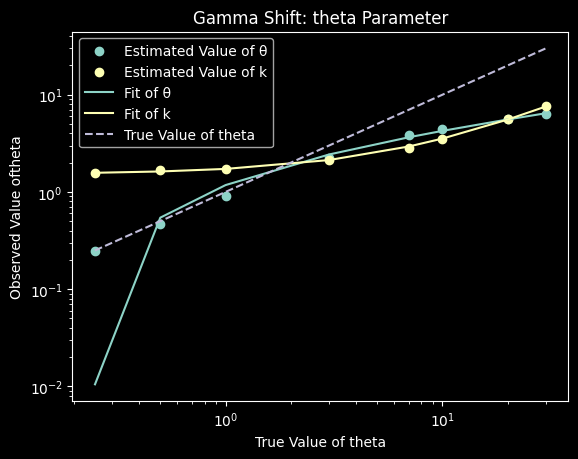

In [7]:
params_shift_plot(theta_set, "theta").show()

<function params_shift.<locals>.<lambda> at 0x7f87b87d89a0>
Estimated Coefficients:  [-6.49497524e-04  1.64476702e+00]
Estimated Coefficients:  [ 0.96217716 -0.00722187]


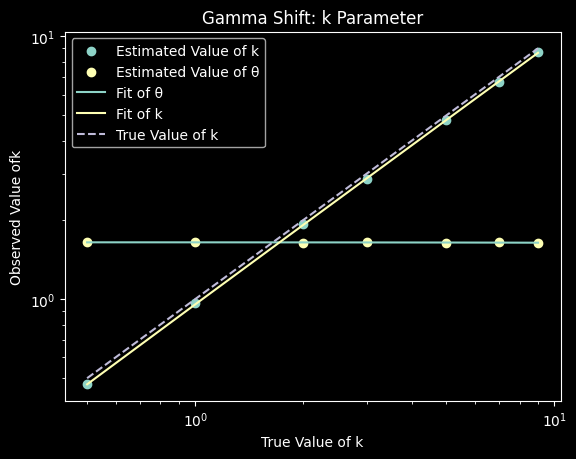

In [8]:
params_shift_plot(k_set, "k").show()

In [9]:
def big_r_gamma_est(theta, k, n_fol):
    theta_prime, k_prime, _ = gamma_shift(theta, k, n_fol)
    theta_est = ((theta_prime + 1.99) / 2.87)**(100/36)
    k_est = (k_prime - 0.02) / 0.95
    
    print(f"Shifted theta: {round(theta_prime, 3)}")
    print(f"Estimated theta: {round(theta_est, 3)}")
    print(f"True theta: {round(theta, 3)}")
    print(f"Theta difference: {round(theta_est - theta, 3)}")
    
    print(f"Shifted k: {round(k_prime, 3)}")
    print(f"Estimated k: {round(k_est, 3)}")
    print(f"True k: {round(k, 3)}")
    print(f"K difference: {round(k_est - k, 3)}")

In [15]:
big_r_gamma_est(2, 2, 1000)

Shifted theta: 1.611
Estimated theta: 1.878
True theta: 2
Theta difference: -0.122
Shifted k: 1.971
Estimated k: 2.053
True k: 2
K difference: 0.053


In [16]:
big_r_gamma_est(1, 1, 1000)

Shifted theta: 0.952
Estimated theta: 1.071
True theta: 1
Theta difference: 0.071
Shifted k: 0.849
Estimated k: 0.872
True k: 1
K difference: -0.128


In [17]:
for i in range(10):
    big_r_gamma_est(int(i) + 1, 2, 1000)
    print("\n")
    

Shifted theta: 0.909
Estimated theta: 1.028
True theta: 1
Theta difference: 0.028
Shifted k: 1.717
Estimated k: 1.787
True k: 2
K difference: -0.213


Shifted theta: 1.561
Estimated theta: 1.806
True theta: 2
Theta difference: -0.194
Shifted k: 1.977
Estimated k: 2.06
True k: 2
K difference: 0.06


Shifted theta: 2.346
Estimated theta: 3.146
True theta: 3
Theta difference: 0.146
Shifted k: 1.968
Estimated k: 2.05
True k: 2
K difference: 0.05


Shifted theta: 2.704
Estimated theta: 3.921
True theta: 4
Theta difference: -0.079
Shifted k: 2.398
Estimated k: 2.504
True k: 2
K difference: 0.504


Shifted theta: 3.113
Estimated theta: 4.948
True theta: 5
Theta difference: -0.052
Shifted k: 2.455
Estimated k: 2.563
True k: 2
K difference: 0.563


Shifted theta: 3.347
Estimated theta: 5.602
True theta: 6
Theta difference: -0.398
Shifted k: 2.794
Estimated k: 2.92
True k: 2
K difference: 0.92


Shifted theta: 3.584
Estimated theta: 6.32
True theta: 7
Theta difference: -0.68
Shifted k: 3.074
Est

# Chapter 2

In [ ]:
theta_set = [0.5, 3, 10]
def big_r_inf_box(theta_set, n_fol):
    _, axes = plt.subplots(1, 3, figsize = (15, 5), sharey = True)
    for i, theta in enumerate(theta_set):
        ax = axes[i]
        plt.sca(ax) # set current axis
        theta_pred = np.array([gamma_shift(theta, 2, n_fol)[0] for rep in range(30)])
        theta_est = ((theta_pred + 1.99) / 2.87)**(100/36)
        ax.boxplot(theta_est)
        ax.axhline(y = theta, color = 'red', linestyle = '--', 
                label = f"True value = {theta}")
        ax.set_title(f'θ of Gamma R Estimation (True θ = {theta})')
    return plt

<module 'matplotlib.pyplot' from '/home/bees/code/lib/python3.12/site-packages/matplotlib/pyplot.py'>

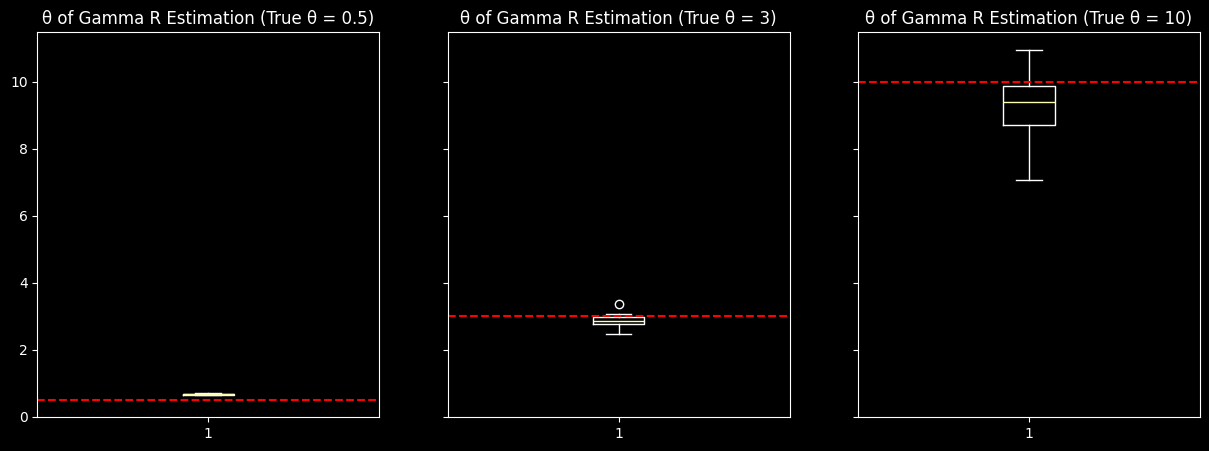

In [11]:
big_r_inf_box(theta_set, 1000)

IndexError: index 3 is out of bounds for axis 0 with size 3

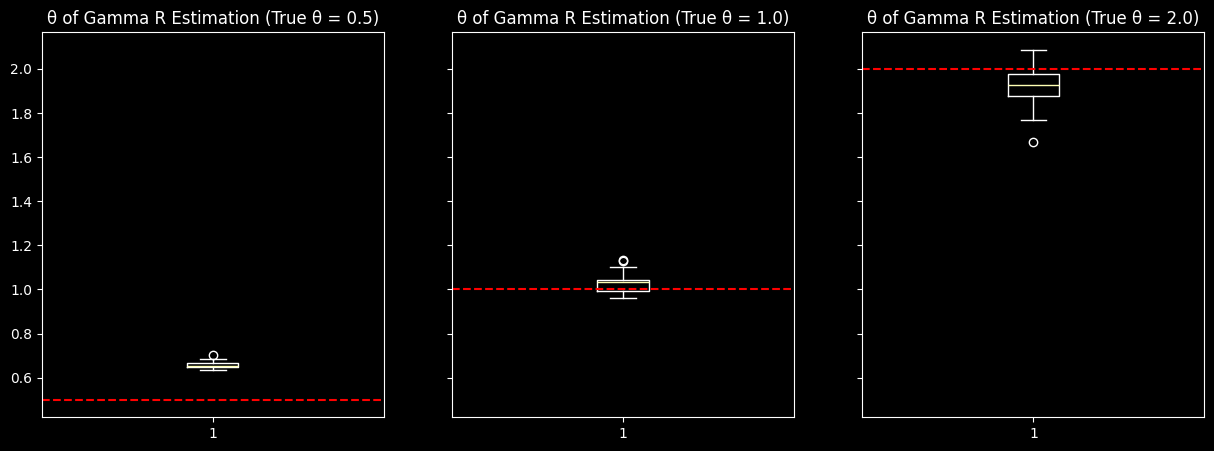

In [12]:
big_r_inf_box(k_set, 1000)